In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/CreditRisk/

/content/drive/MyDrive/CreditRisk


In [3]:
#pip install --upgrade xlrd

# Importing Libraries:

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.lda import LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from  sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve,  precision_recall_curve, auc, roc_curve

# tensorflow
import tensorflow as tf
from tensorflow import keras

# save/load models
import pickle
from tensorflow.keras.models import load_model







sns.set(style="white", palette="Set2", color_codes=True)



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importing Data:

In [5]:
df = pd.read_excel('default of credit card clients.xls', skiprows = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df = df.rename(columns={'PAY_0':'PAY_1'})


In [8]:
# due to updates in the dataset
df.EDUCATION = df.EDUCATION.replace({4: 0, 5: 0, 6: 0})

In [9]:
df = df.drop(columns = 'ID')

# Splitting Data:

In [10]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

In [11]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify = y)

# Exploring Data:

In [12]:
train_df = X_train.copy()
train_df['target'] = y

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  21000 non-null  int64
 1   SEX        21000 non-null  int64
 2   EDUCATION  21000 non-null  int64
 3   MARRIAGE   21000 non-null  int64
 4   AGE        21000 non-null  int64
 5   PAY_1      21000 non-null  int64
 6   PAY_2      21000 non-null  int64
 7   PAY_3      21000 non-null  int64
 8   PAY_4      21000 non-null  int64
 9   PAY_5      21000 non-null  int64
 10  PAY_6      21000 non-null  int64
 11  BILL_AMT1  21000 non-null  int64
 12  BILL_AMT2  21000 non-null  int64
 13  BILL_AMT3  21000 non-null  int64
 14  BILL_AMT4  21000 non-null  int64
 15  BILL_AMT5  21000 non-null  int64
 16  BILL_AMT6  21000 non-null  int64
 17  PAY_AMT1   21000 non-null  int64
 18  PAY_AMT2   21000 non-null  int64
 19  PAY_AMT3   21000 non-null  int64
 20  PAY_AMT4   21000 non-null  int64
 21  PAY_AMT5

In [14]:
train_df.describe()[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0,167499.142857,129767.049797,10000.0,50000.00,140000.0,240000.00,1000000.0
BILL_AMT1,21000.0,51194.218810,73633.982306,-165580.0,3509.75,22225.5,67062.75,964511.0
BILL_AMT2,21000.0,49140.803905,71162.698748,-69777.0,2999.50,20993.0,64137.25,983931.0
BILL_AMT3,21000.0,46983.414667,68726.737546,-61506.0,2729.25,20012.0,60042.50,855086.0
BILL_AMT4,21000.0,43314.444238,64429.078267,-81334.0,2390.25,18984.0,54647.75,891586.0
BILL_AMT5,21000.0,40325.764524,61008.873612,-81334.0,1751.25,18100.0,50232.00,927171.0
BILL_AMT6,21000.0,38837.678000,59553.243817,-209051.0,1239.75,17032.0,49054.75,961664.0
PAY_AMT1,21000.0,5654.306714,16424.968267,0.0,1000.00,2118.5,5021.25,873552.0
PAY_AMT2,21000.0,5912.902429,20702.288143,0.0,885.50,2015.0,5000.00,1215471.0
PAY_AMT3,21000.0,5252.244524,18016.514345,0.0,390.00,1821.5,4600.00,896040.0


In [15]:
train_df['target'].value_counts(normalize = True)

0    0.77881
1    0.22119
Name: target, dtype: float64

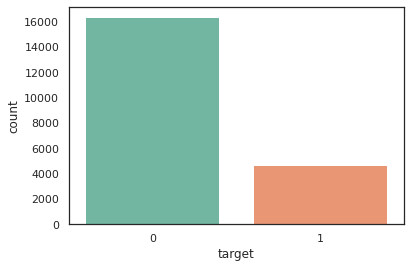

In [16]:
sns.countplot(train_df['target']);

In [17]:
train_df['SEX'].value_counts()

2    12675
1     8325
Name: SEX, dtype: int64

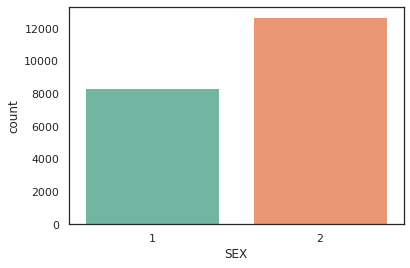

In [18]:
sns.countplot(train_df['SEX']);

In [19]:
train_df['EDUCATION'].value_counts()

2    9833
1    7379
3    3440
0     348
Name: EDUCATION, dtype: int64

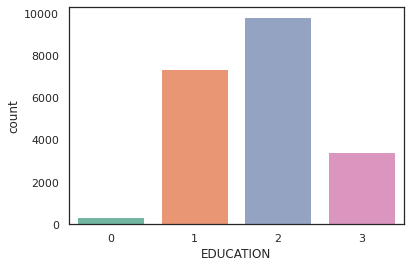

In [20]:
sns.countplot(train_df['EDUCATION']);

In [21]:
train_df['MARRIAGE'].value_counts()

2    11208
1     9526
3      226
0       40
Name: MARRIAGE, dtype: int64

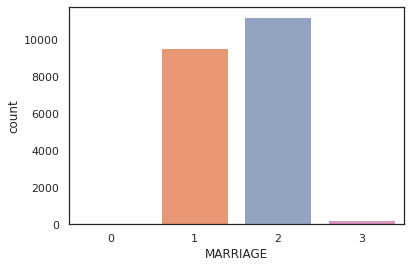

In [22]:
sns.countplot(train_df['MARRIAGE']);

In [23]:
train_df.PAY_1.unique()

array([ 0, -2,  2, -1,  1,  3,  7,  4,  5,  8,  6])

In [24]:
for i in range(6):
  print('Value counts for PAY{}: \n'.format(i+ 1))
  print(train_df['PAY_'+ str(i+1)].value_counts())
  print('**'*15)


Value counts for PAY1: 

 0    10285
-1     3971
 1     2616
-2     1933
 2     1887
 3      213
 4       51
 5       13
 8       13
 6       10
 7        8
Name: PAY_1, dtype: int64
******************************
Value counts for PAY2: 

 0    10985
-1     4248
 2     2753
-2     2652
 3      224
 4       68
 1       25
 5       20
 7       14
 6       10
 8        1
Name: PAY_2, dtype: int64
******************************
Value counts for PAY3: 

 0    11038
-1     4140
-2     2864
 2     2685
 3      166
 4       57
 6       16
 7       15
 5       14
 1        3
 8        2
Name: PAY_3, dtype: int64
******************************
Value counts for PAY4: 

 0    11509
-1     3957
-2     3051
 2     2242
 3      131
 4       50
 7       31
 5       24
 6        2
 1        2
 8        1
Name: PAY_4, dtype: int64
******************************
Value counts for PAY5: 

 0    11856
-1     3860
-2     3210
 2     1841
 3      127
 4       62
 7       29
 5       11
 6        3
 8        1

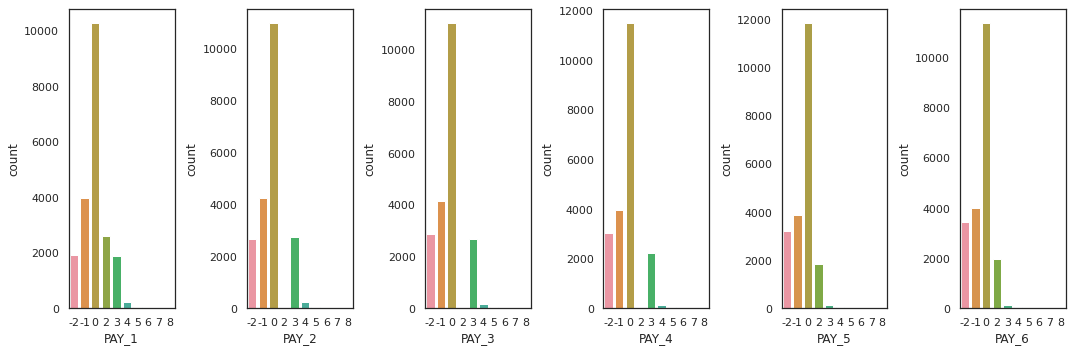

In [25]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (15, 5), )

for i in range(6):
  sns.countplot(train_df['PAY_' + str(i+1)], ax = axes[i])
fig.tight_layout()
plt.show();



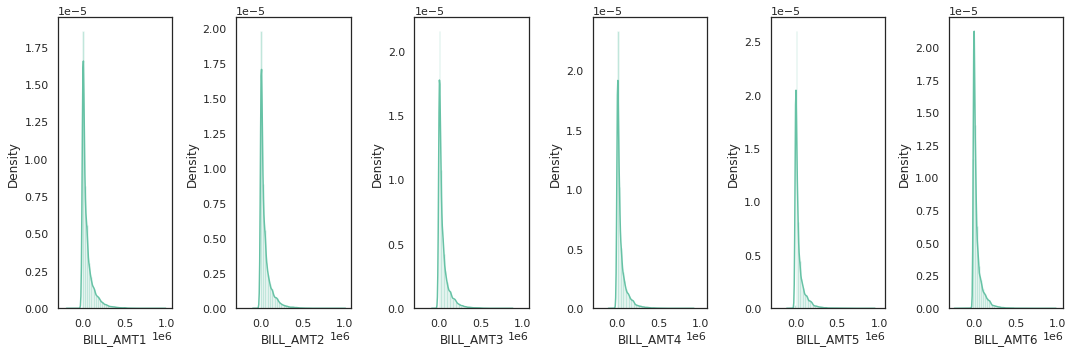

In [26]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (15, 5), )

for i in range(6):
  sns.distplot(train_df['BILL_AMT' + str(i+1)], ax = axes[i])
  #axes[i].set(xlim=(0, 700000))
fig.tight_layout()
plt.show();

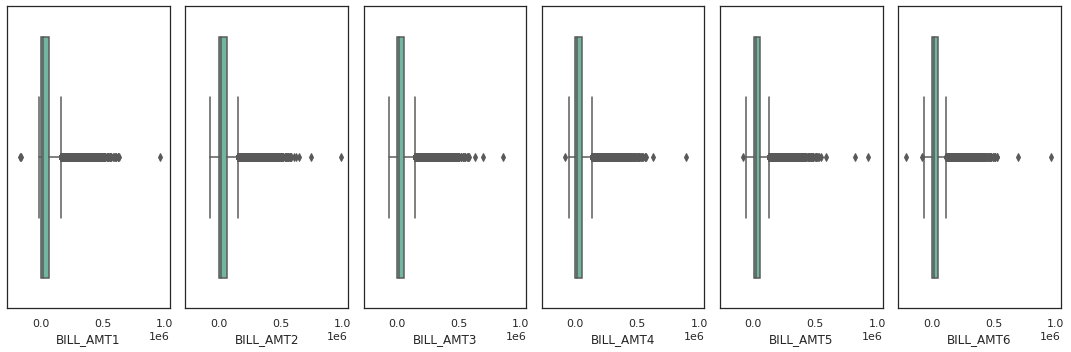

In [27]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (15, 5), )

for i in range(6):
  sns.boxplot(train_df['BILL_AMT' + str(i+1)], ax = axes[i])
  #axes[i].set(xlim=(0, 700000))
fig.tight_layout()
plt.show();

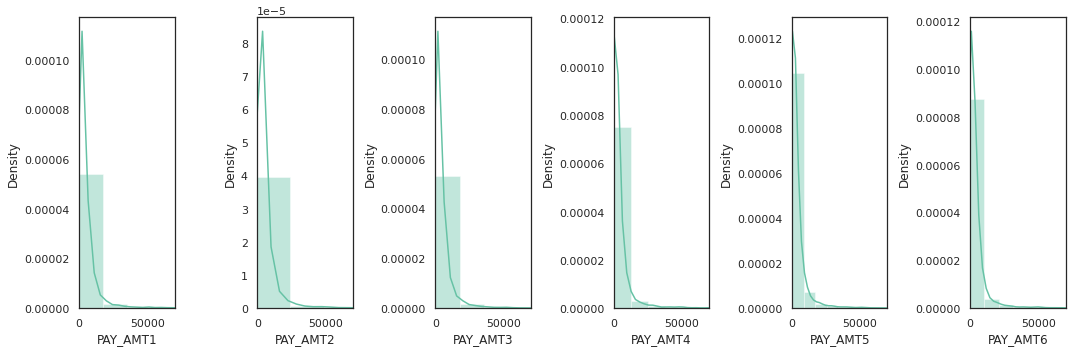

In [28]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (15, 5), )

for i in range(6):
  sns.distplot(train_df['PAY_AMT' + str(i+1)], ax = axes[i])
  axes[i].set(xlim=(0, 70000))
fig.tight_layout()
plt.show();

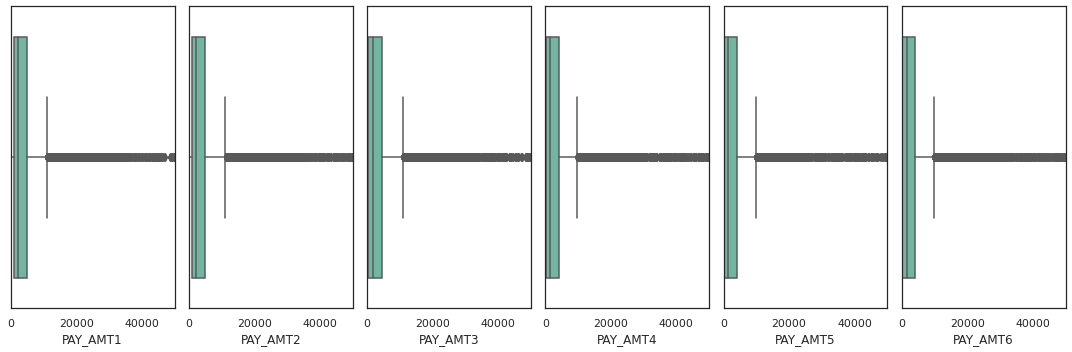

In [29]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (15, 5), )

for i in range(6):
  sns.boxplot(train_df['PAY_AMT' + str(i+1)], ax = axes[i])
  axes[i].set(xlim=(0, 50000))
fig.tight_layout()
plt.show();

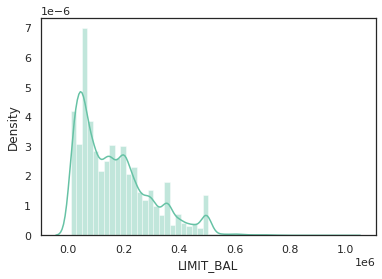

In [30]:
sns.distplot(train_df.LIMIT_BAL);

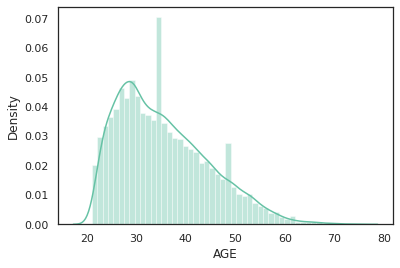

In [31]:
sns.distplot(train_df.AGE);

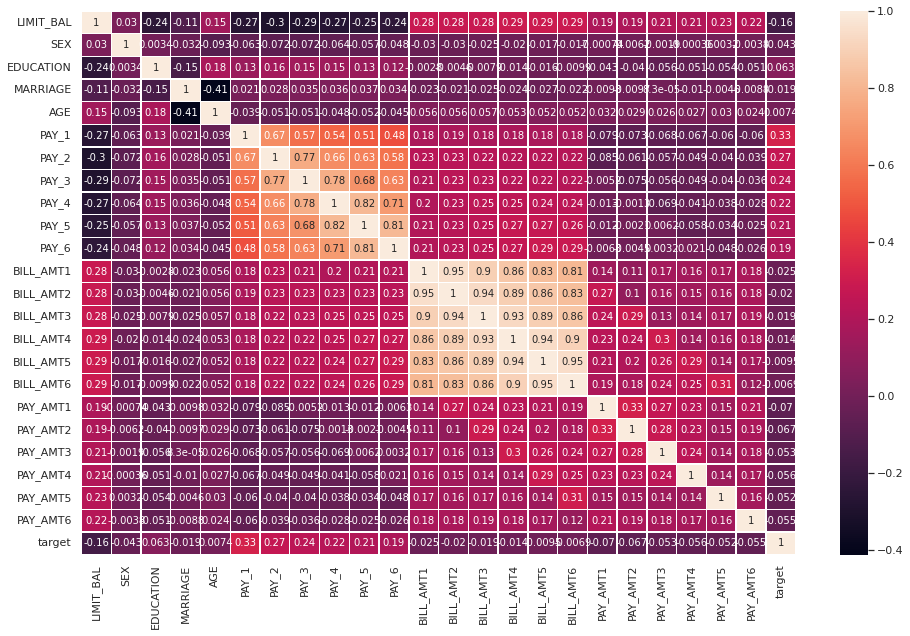

In [32]:
plt.figure(figsize = (16,10))
sns.heatmap(train_df.corr('pearson'), annot = True,  linewidths=.4)


In [33]:
train_df.corr('pearson')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
LIMIT_BAL,1.000000,0.030019,-0.241789,-0.114321,0.150665,-0.268745,-0.300524,-0.291529,-0.270330,-0.253687,-0.237292,0.284796,0.277808,0.284634,0.294917,0.294924,0.290908,0.192822,0.194009,0.210032,0.206549,0.225059,0.217728,-0.159213
SEX,0.030019,1.000000,0.003408,-0.031797,-0.092993,-0.063384,-0.071592,-0.072490,-0.064492,-0.057486,-0.048165,-0.029792,-0.029941,-0.024774,-0.020334,-0.016801,-0.017362,-0.000741,-0.006204,-0.001941,-0.000358,0.003239,-0.003829,-0.042592
EDUCATION,-0.241789,0.003408,1.000000,-0.147764,0.179548,0.133426,0.159785,0.153899,0.147380,0.132533,0.119750,-0.002823,-0.004627,-0.007932,-0.013908,-0.016114,-0.009893,-0.043201,-0.039729,-0.056160,-0.050639,-0.054290,-0.051238,0.063066
MARRIAGE,-0.114321,-0.031797,-0.147764,1.000000,-0.412734,0.021073,0.028392,0.035035,0.035573,0.036986,0.033648,-0.023473,-0.021028,-0.025159,-0.023743,-0.026559,-0.022216,-0.009752,-0.009655,0.000083,-0.010333,-0.004612,-0.008814,-0.018953
AGE,0.150665,-0.092993,0.179548,-0.412734,1.000000,-0.038690,-0.050860,-0.050726,-0.048490,-0.052244,-0.045209,0.056000,0.056266,0.056552,0.052852,0.051736,0.052343,0.032147,0.028545,0.026337,0.026664,0.030101,0.024031,0.007442
PAY_1,-0.268745,-0.063384,0.133426,0.021073,-0.038690,1.000000,0.668734,0.570209,0.538003,0.509904,0.476093,0.184698,0.187295,0.181542,0.178148,0.181886,0.177433,-0.078706,-0.073429,-0.068080,-0.067495,-0.060391,-0.060274,0.327370
PAY_2,-0.300524,-0.071592,0.159785,0.028392,-0.050860,0.668734,1.000000,0.766578,0.664592,0.626614,0.581857,0.232610,0.231981,0.224539,0.218460,0.219327,0.217521,-0.084948,-0.060746,-0.057046,-0.048707,-0.039948,-0.038857,0.267821
PAY_3,-0.291529,-0.072490,0.153899,0.035035,-0.050726,0.570209,0.766578,1.000000,0.776623,0.684931,0.633862,0.206717,0.234962,0.227824,0.224333,0.223308,0.219741,-0.005242,-0.074704,-0.056496,-0.048912,-0.040427,-0.035675,0.240649
PAY_4,-0.270330,-0.064492,0.147380,0.035573,-0.048490,0.538003,0.664592,0.776623,1.000000,0.817411,0.711475,0.202622,0.225468,0.248510,0.245974,0.244207,0.239263,-0.013462,-0.001312,-0.069446,-0.040790,-0.037798,-0.027729,0.223032
PAY_5,-0.253687,-0.057486,0.132533,0.036986,-0.052244,0.509904,0.626614,0.684931,0.817411,1.000000,0.813366,0.206807,0.226934,0.248253,0.273742,0.272048,0.264560,-0.012053,-0.002122,0.006227,-0.058310,-0.033796,-0.024888,0.208392


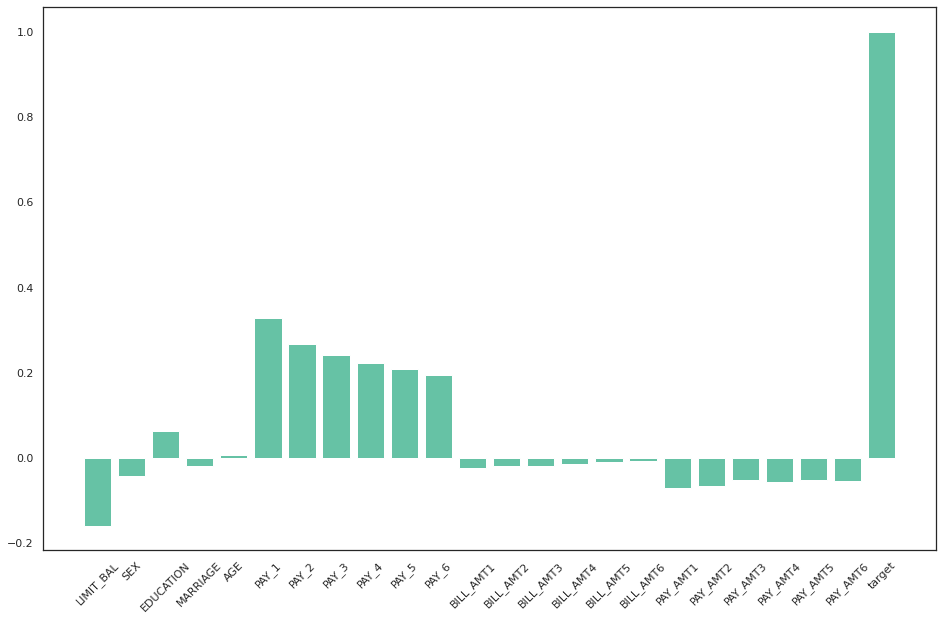

In [34]:
plt.figure(figsize = (16,10))
plt.bar(height = train_df.corr('pearson')['target'], x = train_df.corr('pearson')['target'].index,)
plt.xticks(rotation = 45);

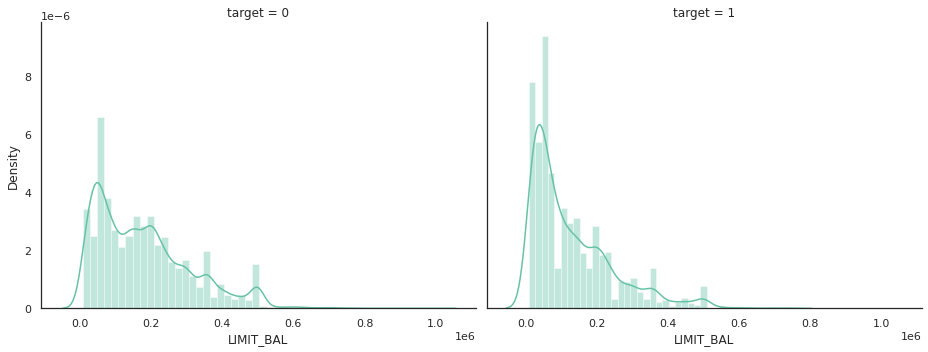

In [35]:
g = sns.FacetGrid(train_df, col="target", aspect = 1.3, height = 5)
g.map(sns.distplot, 'LIMIT_BAL');

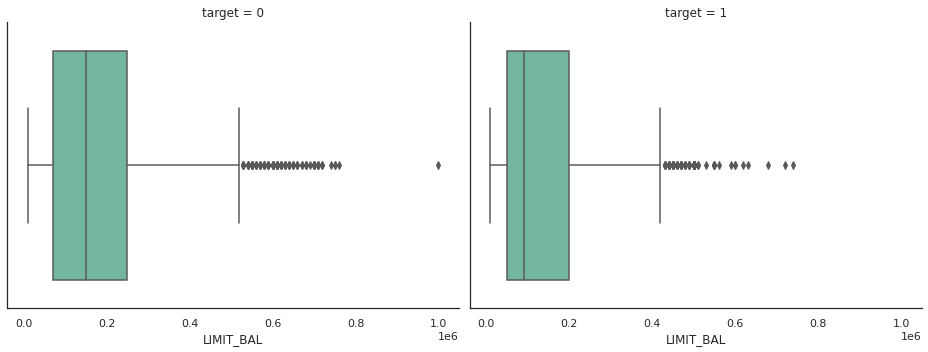

In [36]:
g2 = sns.FacetGrid(train_df, col="target", aspect = 1.3, height = 5)
g2.map(sns.boxplot, 'LIMIT_BAL');

In [37]:
train_df.groupby('target').LIMIT_BAL.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,16355.0,178509.446652,131618.961919,10000.0,70000.0,150000.0,250000.0,1000000.0
1,4645.0,128731.969860,114927.449030,10000.0,50000.0,90000.0,200000.0,740000.0



*   **The mean of balance for customers who default is less than who don't.**
*   **For Default customers 50% of their balances is less than (90000) Non-default customers (150000).**



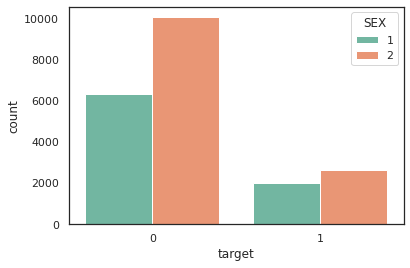

In [38]:
sns.countplot('target', hue = 'SEX', data = train_df);

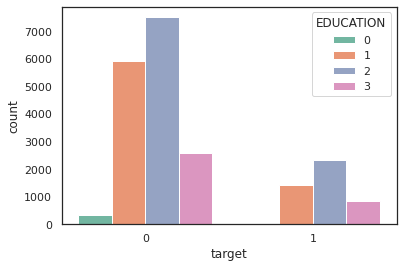

In [39]:
sns.countplot('target', hue = 'EDUCATION', data = train_df);

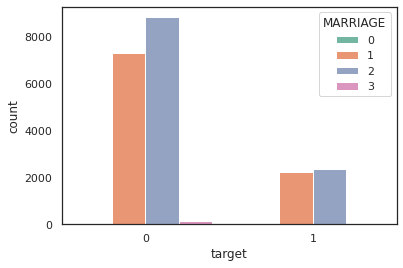

In [40]:
sns.countplot('target', hue = 'MARRIAGE', data = train_df);

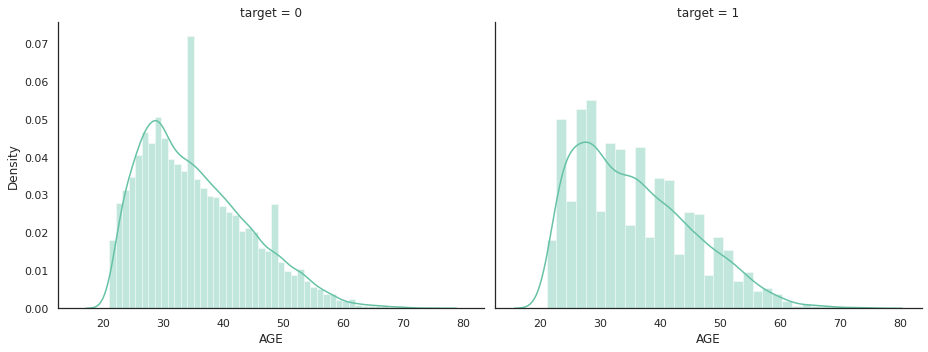

In [41]:
g3 = sns.FacetGrid(train_df, col="target", aspect = 1.3, height = 5)
g3.map(sns.distplot, 'AGE');

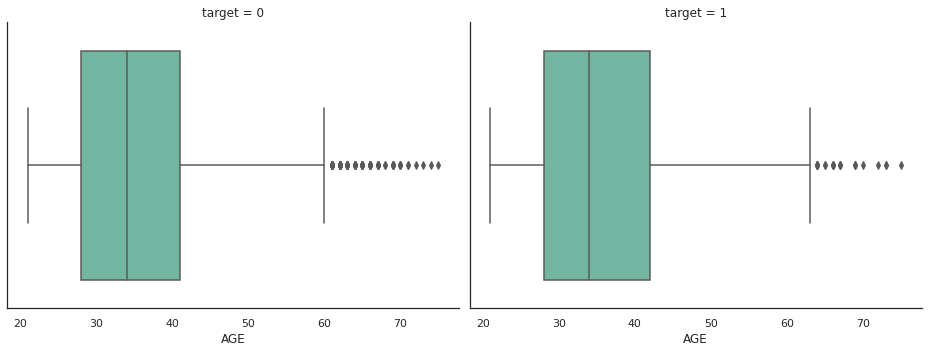

In [42]:
g4 = sns.FacetGrid(train_df, col="target", aspect = 1.3, height = 5)
g4.map(sns.boxplot, 'AGE');

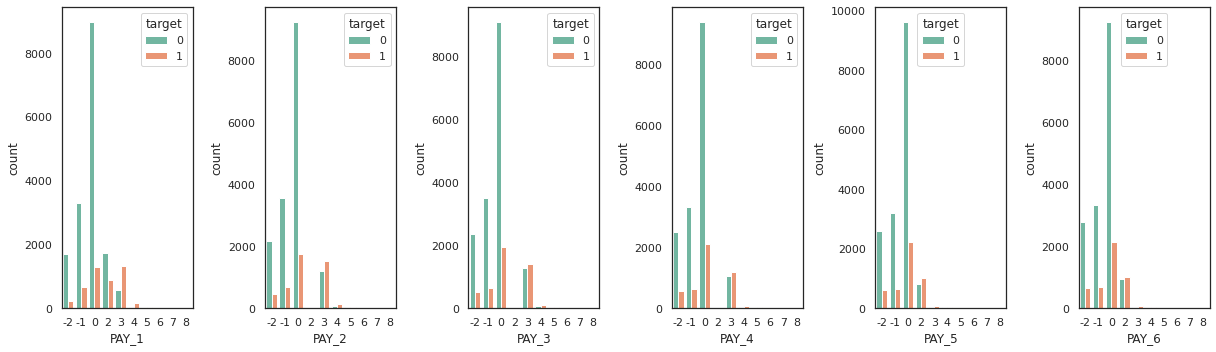

In [43]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (17, 5), )

for i in range(6):
  sns.countplot('PAY_' + str(i+1), ax = axes[i], hue = 'target', data = train_df)
fig.tight_layout()
plt.show();


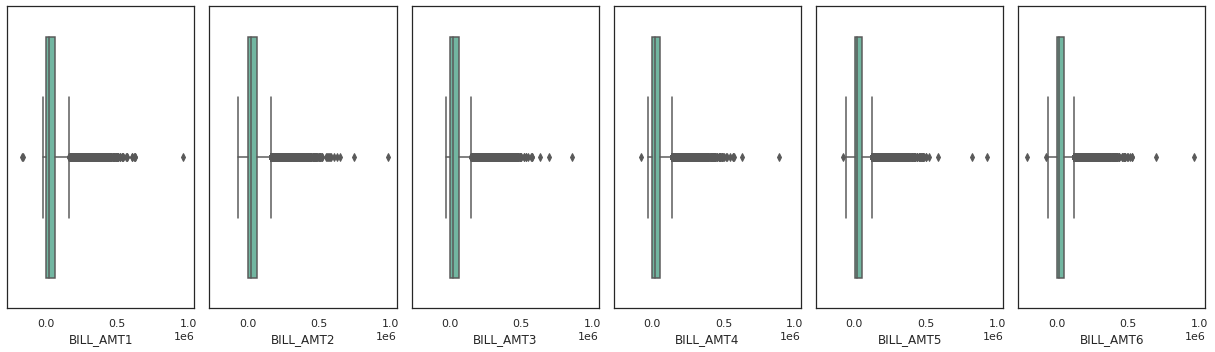

In [44]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (17, 5), )

for i in range(6):
  sns.boxplot(train_df[train_df.target == 0]['BILL_AMT' + str(i+1)], ax = axes[i])
fig.tight_layout()
plt.show();


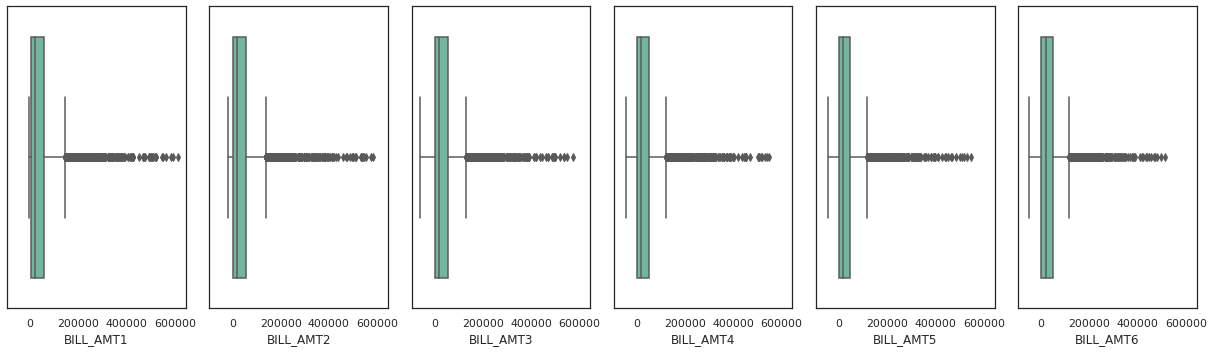

In [45]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (17, 5), )

for i in range(6):
  sns.boxplot(train_df[train_df.target == 1]['BILL_AMT' + str(i+1)], ax = axes[i])
fig.tight_layout()
plt.show();

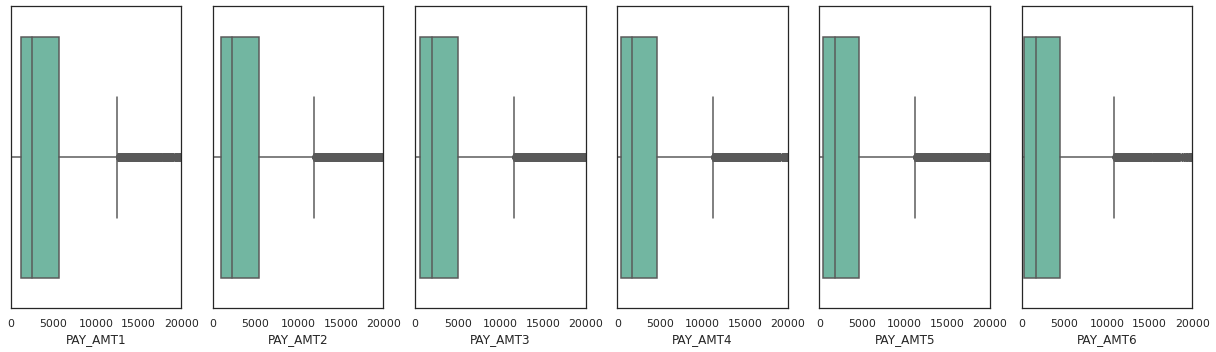

In [46]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (17, 5), )

for i in range(6):
  sns.boxplot(train_df[train_df.target == 0]['PAY_AMT' + str(i+1)], ax = axes[i])
  plt.xlim(0, 20000)
fig.tight_layout()
plt.show();


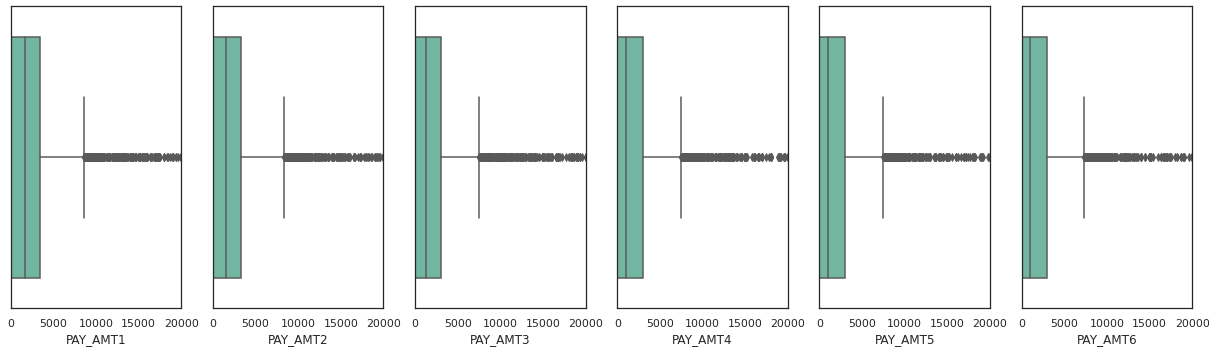

In [47]:
fig, axes = plt.subplots(1, 6, sharex=True, figsize = (17, 5), )

for i in range(6):
  sns.boxplot(train_df[train_df.target == 1]['PAY_AMT' + str(i+1)], ax = axes[i])
  plt.xlim(0, 20000)
fig.tight_layout()
plt.show();

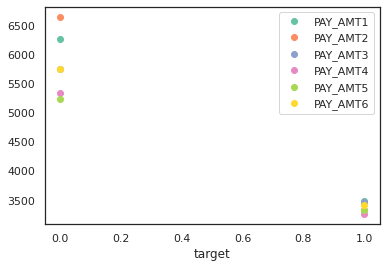

In [48]:
train_df.groupby('target')[['PAY_AMT'+ str(i+1) for i in range(6)]].mean().plot(marker = 'o', linestyle= '');

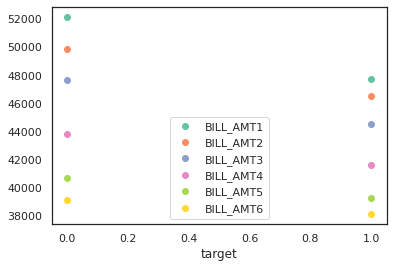

In [49]:
train_df.groupby('target')[['BILL_AMT'+ str(i+1) for i in range(6)]].mean().plot(marker = 'o', linestyle= '');

In [50]:
for i in range(1, 7):
  train_df['diff'+ str(i)] = train_df['BILL_AMT'+ str(i)] - train_df['PAY_AMT' + str(i)]

In [51]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,diff1,diff2,diff3,diff4,diff5,diff6
11018,160000,2,2,2,32,0,0,0,0,0,0,156098,156259,155404,153234,156731,155818,6000,6000,5600,6000,6000,5500,0,150098,150259,149804,147234,150731,150318
1710,100000,2,1,2,30,0,0,0,0,2,0,28383,32903,42283,51539,50583,52588,5000,10000,10000,0,2846,1936,1,23383,22903,32283,51539,47737,50652
4618,80000,1,1,2,29,0,0,0,0,0,0,73722,75323,64277,45455,42231,42804,3300,2500,1556,1600,1600,1600,0,70422,72823,62721,43855,40631,41204
5482,20000,2,2,1,27,0,0,-1,-1,-2,-2,7286,2160,780,0,0,0,1006,780,0,0,0,0,0,6280,1380,780,0,0,0
26187,50000,2,1,2,30,-2,-2,-2,-2,-2,-2,0,2070,0,0,0,0,2070,0,0,0,0,0,0,-2070,2070,0,0,0,0


In [52]:
train_df.groupby('target')[['diff'+ str(i+1) for i in range(6)]].mean()

,diff1,diff2,diff3,diff4,diff5,diff6
target,,,,,,
0,45902.403546,43244.065362,41930.033751,38461.226292,35392.200367,33305.427087
1,44263.583208,43170.988590,41030.973305,38357.318407,35907.612056,34653.177180


In [53]:
diff_means_0 = train_df[train_df.target == 0][['diff'+ str(i+1) for i in range(6)]].mean(axis = 0)

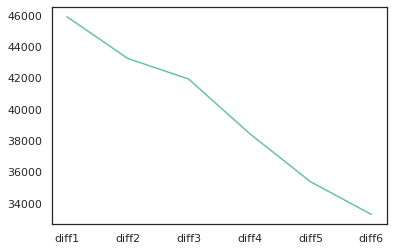

In [54]:
sns.lineplot(x = diff_means_0.index, y= diff_means_0);

In [55]:
diff_means_1 = train_df[train_df.target == 1][['diff'+ str(i+1) for i in range(6)]].mean(axis = 0)

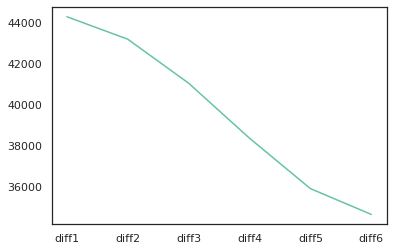

In [56]:
sns.lineplot(x = diff_means_1.index, y= diff_means_1);

In [57]:
train_df[['diff'+ str(i+1) for i in range(6)] + ['LIMIT_BAL']].corr('pearson')

,diff1,diff2,diff3,diff4,diff5,diff6,LIMIT_BAL
diff1,1.000000,0.876446,0.824624,0.796292,0.761442,0.724891,0.243498
diff2,0.876446,1.000000,0.819111,0.798939,0.767738,0.727337,0.218563
diff3,0.824624,0.819111,1.000000,0.839371,0.796825,0.748577,0.229353
diff4,0.796292,0.798939,0.839371,1.000000,0.847891,0.800191,0.246736
diff5,0.761442,0.767738,0.796825,0.847891,1.000000,0.828992,0.240132
diff6,0.724891,0.727337,0.748577,0.800191,0.828992,1.000000,0.224567
LIMIT_BAL,0.243498,0.218563,0.229353,0.246736,0.240132,0.224567,1.000000


In [58]:
train_df['total_status'] = train_df[['PAY_'+ str(i) for i in range(1, 7)]].sum(axis = 1)

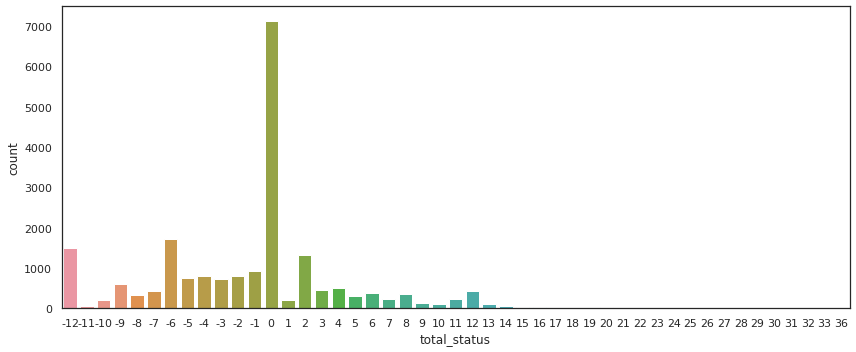

In [59]:
plt.figure(figsize = (12, 5))

sns.countplot(train_df.total_status)
plt.tight_layout();

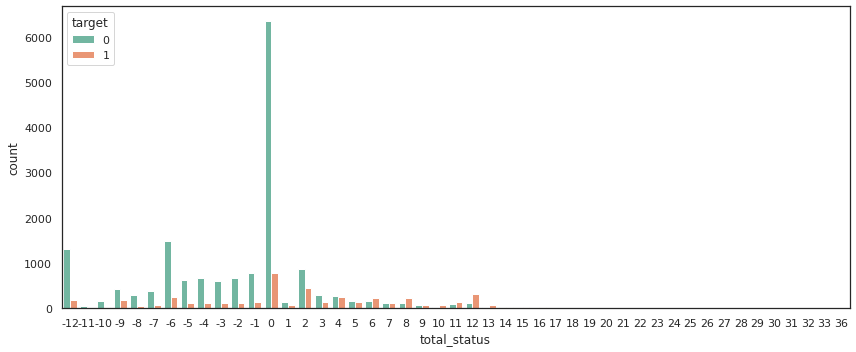

In [60]:
plt.figure(figsize = (12, 5))
sns.countplot('total_status', data= train_df, hue = 'target')
plt.tight_layout();

# Summary:
**From our exploratory analysis, we notice the following:**


1.   Default customers have relatively small balance than Non-default customers.
2.   Marital status don't form any differnce in case in default, however in the case of non-default single customers outnumber married ones.
3.   Non Default customers tend to have a positive total status (sum of payment state for each month) on average more than default customers.




# Modeling:

In [61]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,160000,2,2,2,32,0,0,0,0,0,0,156098,156259,155404,153234,156731,155818,6000,6000,5600,6000,6000,5500
1710,100000,2,1,2,30,0,0,0,0,2,0,28383,32903,42283,51539,50583,52588,5000,10000,10000,0,2846,1936
4618,80000,1,1,2,29,0,0,0,0,0,0,73722,75323,64277,45455,42231,42804,3300,2500,1556,1600,1600,1600
5482,20000,2,2,1,27,0,0,-1,-1,-2,-2,7286,2160,780,0,0,0,1006,780,0,0,0,0
26187,50000,2,1,2,30,-2,-2,-2,-2,-2,-2,0,2070,0,0,0,0,2070,0,0,0,0,0


In [62]:
X_train['total_status'] = X_train[['PAY_'+ str(i) for i in range(1, 7)]].sum(axis = 1)
X_test['total_status'] = X_test[['PAY_'+ str(i) for i in range(1, 7)]].sum(axis = 1)

In [63]:
#st_cols = ['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
y_train.value_counts(normalize = True)

0    0.77881
1    0.22119
Name: default payment next month, dtype: float64

## Logistic Regression Model:

In [172]:
clf = LogisticRegression(class_weight= {0: .22, 1: .77})
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test) 
clf_prob = clf.predict_proba(X_test)[:, 1]


In [66]:
clf.score(X_train, y_train)

0.6977619047619048

In [173]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7009
           1       0.38      0.63      0.47      1991

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.76      0.69      0.71      9000



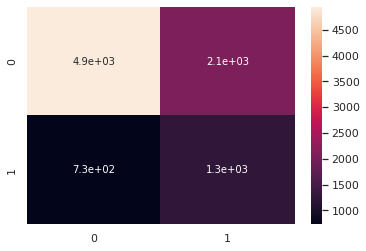

In [174]:
sns.heatmap(confusion_matrix(y_test, clf_pred), annot= True);

In [221]:
log_auc = roc_auc_score(y_test, clf_prob)
log_auc

0.7167940924630232

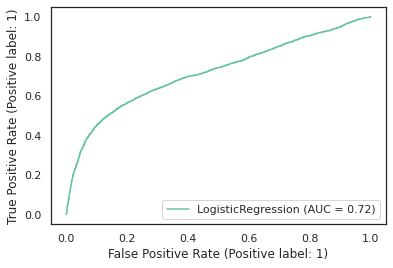

In [176]:
plot_roc_curve(clf, X_test, y_test);

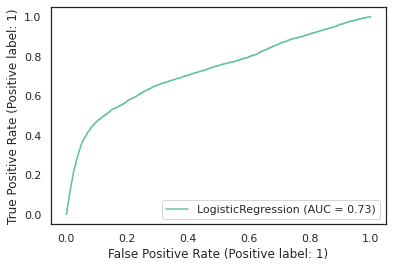

In [71]:
plot_roc_curve(clf, X_train, y_train);

In [269]:
with open('logistic.pkl', 'wb') as f:
    pickle.dump(clf, f)

## Linear Discriminant Analysis:

In [181]:
lda = LDA(n_components = 1, priors=(.77, .22))
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_prob = lda.predict_proba(X_test)[:, 1]

In [178]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.69      0.25      0.37      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.61      0.63      9000
weighted avg       0.79      0.81      0.77      9000



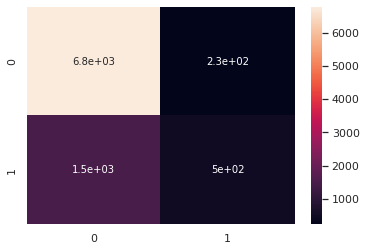

In [179]:
sns.heatmap(confusion_matrix(y_test, lda_pred), annot= True);

In [213]:
lda_auc= roc_auc_score(y_test, lda_prob)
lda_auc

0.7097937651949109

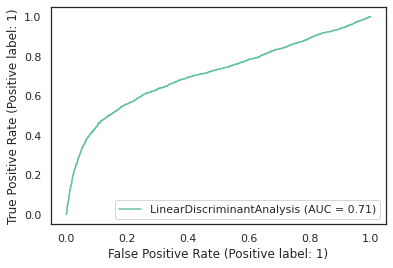

In [76]:
plot_roc_curve(lda, X_test, y_test);

In [77]:
#lda.priors_[0] , (y_train.value_counts(normalize=True)[0])


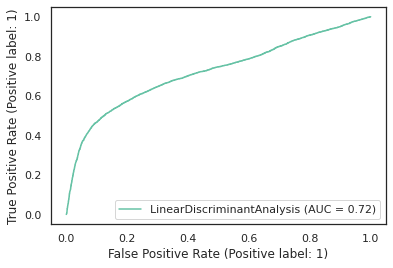

In [78]:
plot_roc_curve(lda, X_train, y_train);

In [270]:
with open('lda.pkl', 'wb') as f:
    pickle.dump(clf, f)

## K-Nearest Neighbour:

In [79]:
error_rate = []
for i in range(1,40):

 knn = KNeighborsClassifier(n_neighbors=i) 
 knn.fit(X_train,y_train) 
 pred_i = knn.predict(X_test) 
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

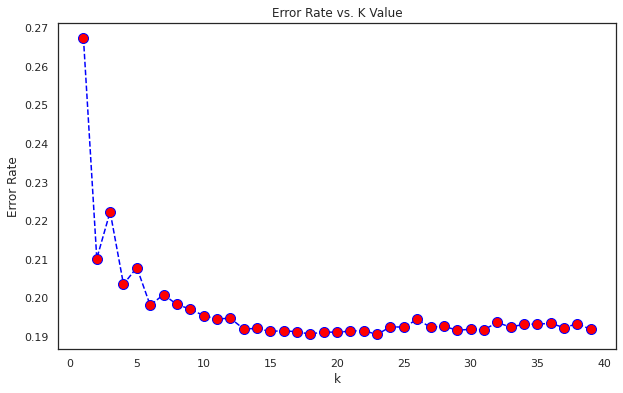

In [80]:
plt.figure(figsize=(10,6)) 
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', 
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('k') 
plt.ylabel('Error Rate')

In [183]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:, 1]


In [82]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7009
           1       0.63      0.33      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.64      0.66      9000
weighted avg       0.79      0.81      0.78      9000



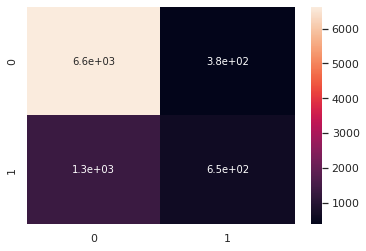

In [83]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot= True);

In [214]:
knn_auc = roc_auc_score(y_test, knn_prob)
knn_auc

0.7396127487375598

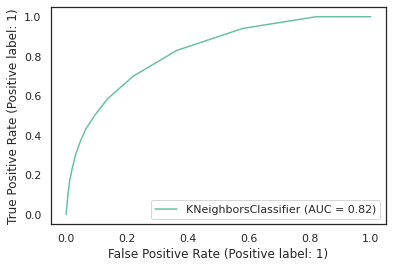

In [85]:
plot_roc_curve(knn, X_train, y_train);

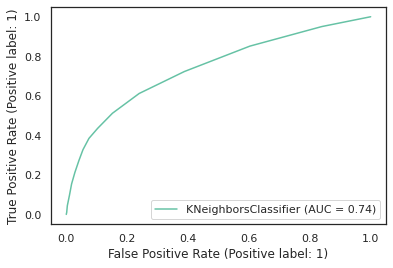

In [86]:
plot_roc_curve(knn, X_test, y_test);

In [271]:
with open('knn.pkl', 'wb') as f:
    pickle.dump(clf, f)

## Gradient Boosting:

In [185]:
g_boost = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
g_boost.fit(X_train, y_train)
g_boost_pred = g_boost.predict(X_test)
g_boost_prob = g_boost.predict_proba(X_test)[:, 1]

In [106]:
print(classification_report(y_test, g_boost_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



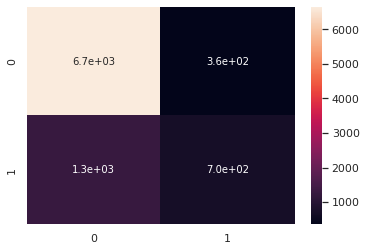

In [107]:
sns.heatmap(confusion_matrix(y_test, g_boost_pred), annot= True);

In [215]:
g_boost_auc = roc_auc_score(y_test, g_boost_prob)
g_boost_auc

0.769208155203194

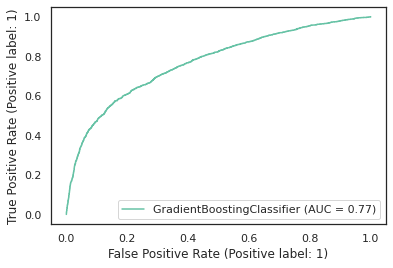

In [109]:
plot_roc_curve(g_boost, X_test, y_test);

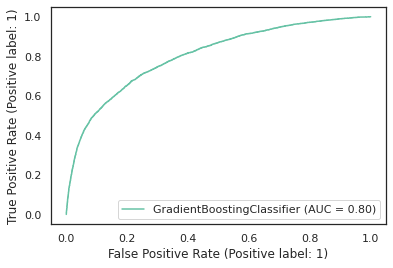

In [110]:
plot_roc_curve(g_boost, X_train, y_train);

In [272]:
with open('gradiebt_boost.pkl', 'wb') as f:
    pickle.dump(clf, f)

## Support Vector Classifier:

In [189]:
svc = SVC(C = 20, class_weight = 'balanced', probability = True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_prob = svc.predict_proba(X_test)[:, 1]

In [190]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      7009
           1       0.47      0.57      0.51      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.76      0.77      9000



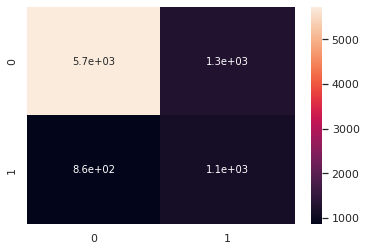

In [191]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot= True);

In [217]:
svc_auc = roc_auc_score(y_test, svc_prob)
svc_auc

0.7451877721397022

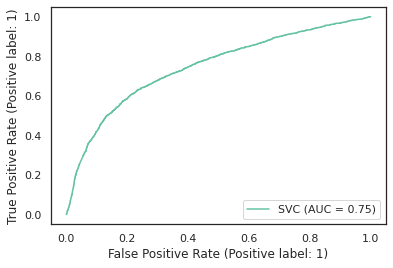

In [193]:
plot_roc_curve(svc, X_test, y_test);

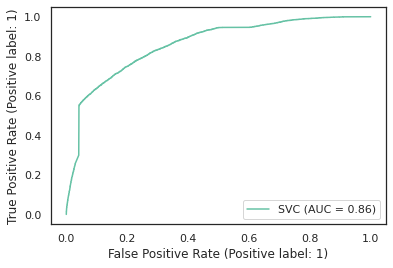

In [194]:
plot_roc_curve(svc, X_train, y_train);

In [273]:
with open('svc.pkl', 'wb') as f:
    pickle.dump(clf, f)

## Neural Network:

In [250]:
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units= 10, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [251]:
model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits= True),
              metrics=[tf.keras.metrics.AUC()])

In [252]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
657/657 [==============================] - 2s 2ms/step - loss: 0.4792 - auc_1: 0.6998
Epoch 2/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4454 - auc_1: 0.7546
Epoch 3/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4368 - auc_1: 0.7697
Epoch 4/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4329 - auc_1: 0.7750
Epoch 5/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4310 - auc_1: 0.7778
Epoch 6/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4282 - auc_1: 0.7829
Epoch 7/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4270 - auc_1: 0.7844
Epoch 8/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4257 - auc_1: 0.7858
Epoch 9/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4240 - auc_1: 0.7881
Epoch 10/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4224 - auc_1: 0.7897
Epoch 11/100
657/65

In [253]:
nn_prob = model.predict(X_test)

In [256]:
nn_pred = nn_prob > .5

In [257]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7009
           1       0.61      0.35      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



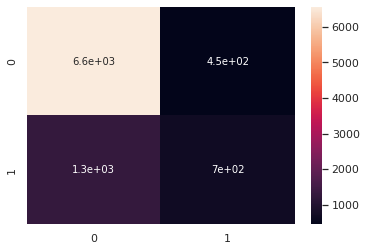

In [258]:
sns.heatmap(confusion_matrix(y_test, nn_pred), annot= True);

In [259]:
ann_auc = roc_auc_score(y_test, nn_prob)
ann_auc

0.7496214417296152

In [260]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, nn_prob)

In [261]:
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
auc_keras

0.7496214417296152

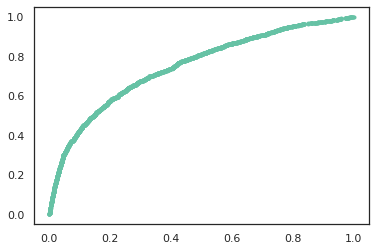

In [262]:
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras);

In [265]:
model.save('ann.h5')

In [263]:
models_df = pd.DataFrame({'logistic_Regression': log_auc,
                          'Linear_Discriminant_Analysis': lda_auc,
                          'KNN': knn_auc,
                          'Gradient_Boosting': g_boost_auc,
                          'SVC': svc_auc,
                          'NN': ann_auc},
                         index = ['AUC'])

In [264]:
models_df

,logistic_Regression,Linear_Discriminant_Analysis,KNN,Gradient_Boosting,SVC,NN
AUC,0.716794,0.709794,0.739613,0.769208,0.745188,0.749621


# Conclusion:
**We used the area under the curve to evaluate our models, and we can see that Gradient Boosting outperform the other models**